# PHISHING WEBSITE DETECTION USING MACHINE LEARNING

In [ ]:
pwd

'D:\\DMBI(Mini-Project)'

# Importing libraries

In [ ]:
# from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and reading the dataset

In [ ]:
#Reading the file

df = pd.read_csv('dataset.csv')

In [ ]:
#Displaying the first five rows of the dataset

df.head()

,index,having_IP_Address,URL_Length,Shortening_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.shape

(11055, 32)

In [ ]:
df.columns

Index(['index', 'having_IP_Address', 'URL_Length', 'Shortening_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
#To check whether there are any missing values or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortening_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

# Data Preprocessing
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
#Displaying a stastical summary of the dataset
df.describe()

,index,having_IP_Address,URL_Length,Shortening_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

df.drop('index',axis=1,inplace=True)

In [ ]:
df.head()

,having_IP_Address,URL_Length,Shortening_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.describe()

,having_IP_Address,URL_Length,Shortening_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortening_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
for col in df:
    print(df[col].name)
    print(df[col].unique())

having_IP_Address
[-1  1]
URL_Length
[ 1  0 -1]
Shortening_Service
[ 1 -1]
having_At_Symbol
[ 1 -1]
double_slash_redirecting
[-1  1]
Prefix_Suffix
[-1  1]
having_Sub_Domain
[-1  0  1]
SSLfinal_State
[-1  1  0]
Domain_registeration_length
[-1  1]
Favicon
[ 1 -1]
port
[ 1 -1]
HTTPS_token
[-1  1]
Request_URL
[ 1 -1]
URL_of_Anchor
[-1  0  1]
Links_in_tags
[ 1 -1  0]
SFH
[-1  1  0]
Submitting_to_email
[-1  1]
Abnormal_URL
[-1  1]
Redirect
[0 1]
on_mouseover
[ 1 -1]
RightClick
[ 1 -1]
popUpWidnow
[ 1 -1]
Iframe
[ 1 -1]
age_of_domain
[-1  1]
DNSRecord
[-1  1]
web_traffic
[-1  0  1]
Page_Rank
[-1  1]
Google_Index
[ 1 -1]
Links_pointing_to_page
[ 1  0 -1]
Statistical_report
[-1  1]
Result
[-1  1]


In [ ]:
#Counting and checking for null values
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortening_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head(10)

,having_IP_Address,URL_Length,Shortening_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,1,1,1,-1,1,0,1,-1
1,1,-1,1,1,1,1,1,1,1,1,...,1,1,1,1,-1,1,1,0,1,1
2,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,-1,1,0,-1,1,0,1,-1
3,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,1,1,1
4,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,1,-1,1,0,1,1
5,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,-1,1,0,1,1
6,-1,-1,1,1,1,-1,0,-1,1,1,...,1,1,-1,1,0,1,1,0,1,-1
7,-1,-1,-1,1,-1,1,1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,1
8,1,1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
9,-1,1,1,-1,1,-1,-1,1,1,1,...,1,1,1,1,-1,-1,1,-1,1,1


<b>Quick observation:</b> The dataset has no null values. So further processing will not be done such as replace or deleting null rows. data is ready for traning, before training we visualise the data

# Visually Displaying data

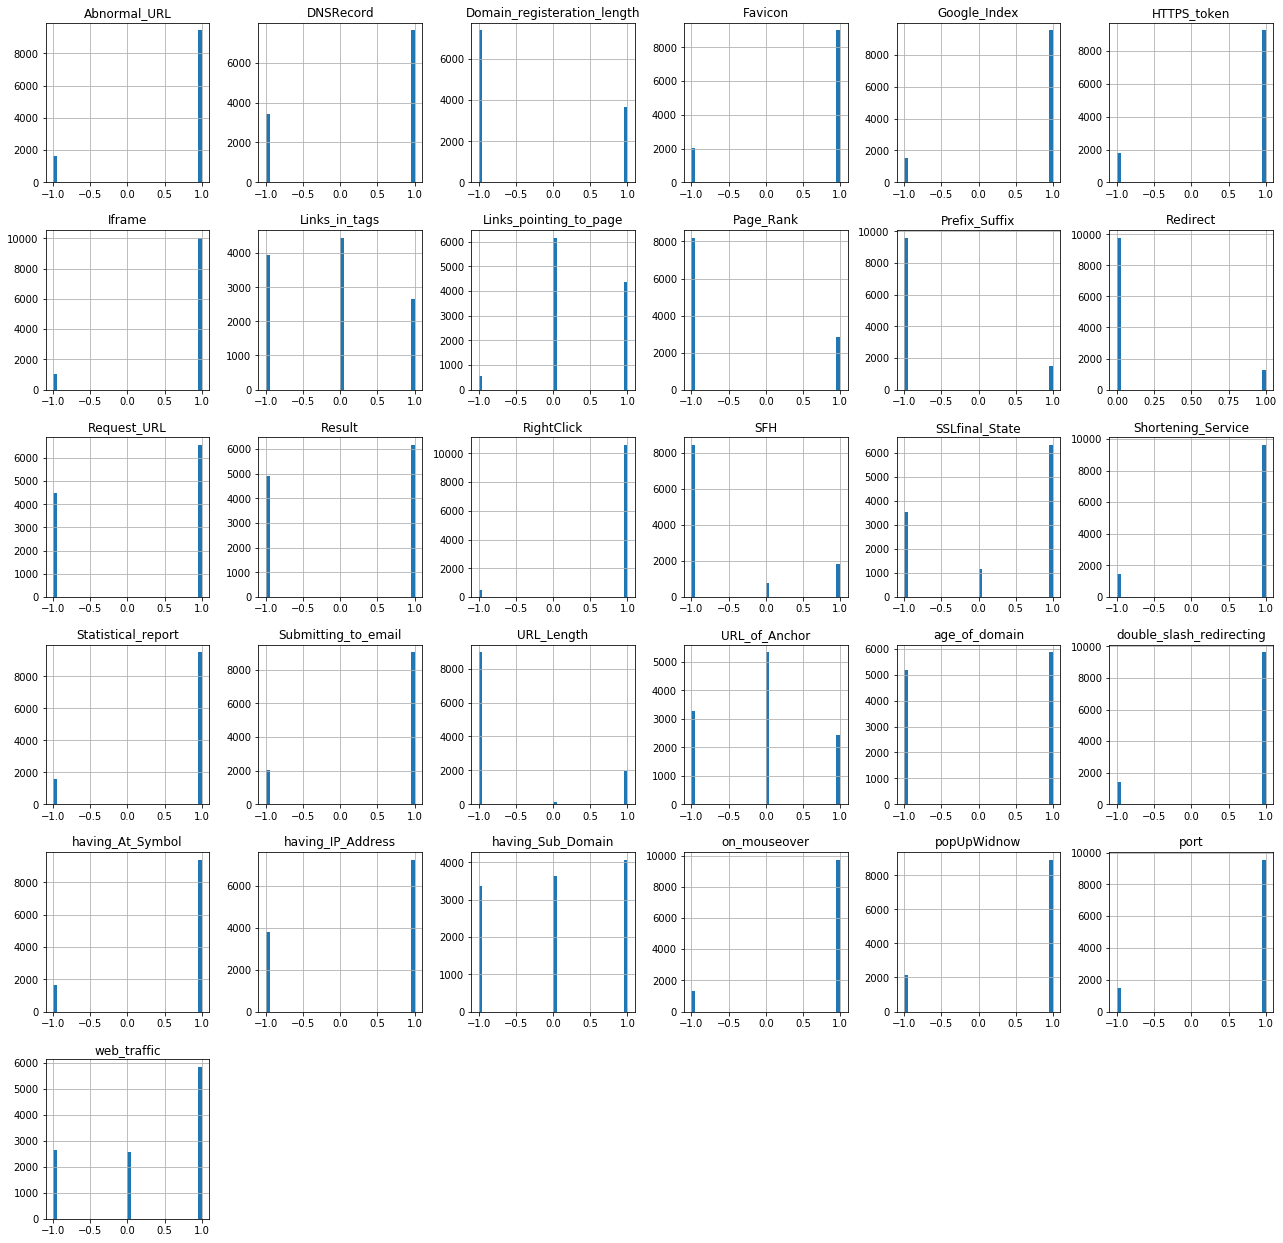

In [ ]:
#Plotting the data distribution with a histogram
df.hist(bins=40,figsize=(22,22))
plt.show()

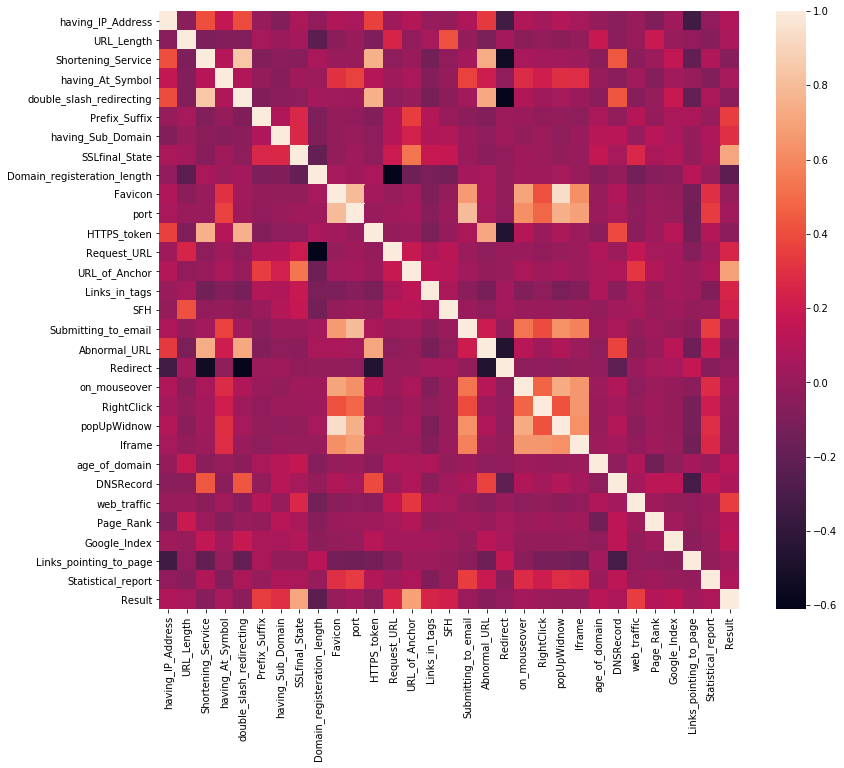

In [ ]:
#Correlation heatmap
plt.figure(figsize=(13,11))
sns.heatmap(df.corr())
plt.show()

# Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y = df['Result']
X = df.drop('Result',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8844
2211
8844
2211


# Machine Learning Models
From the dataset above, we have learnt that this is a Supervised Machine Learning. This dataset uses a classification problem, it has input URL classified as phishing (-1) or legitimate (1). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

1. Decision Tree
2. LogisticRegression
3. RandomForestClassifiers
4. KNeighborsClassifier

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### LOGISTIC REGRESSION

In [ ]:
# instantiate the model 
model = LogisticRegression(max_iter=1000)
# fit the model 
model.fit(X_train,np.ravel(y_train,order='C'))
#predicting the target value from the model for the samples
y_predict= model.predict(X_test)
y_train_model = model.predict(X_train)
y_test_model = model.predict(X_test)
model_score=model.score(X_test, y_test)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_model = accuracy_score(y_train,y_train_model)
acc_test_model = accuracy_score(y_test,y_test_model)

print("LogisticRegression: Accuracy on the Model: ",model_score)
print("LogisticRegression: Accuracy on training Data: {:.3f}".format(acc_train_model))
print("LogisticRegression: Accuracy on test Data: {:.3f}".format(acc_test_model))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

LogisticRegression: Accuracy on the Model:  0.9308005427408412
LogisticRegression: Accuracy on training Data: 0.928
LogisticRegression: Accuracy on test Data: 0.931
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       975
           1       0.93      0.95      0.94      1236

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

[[ 882   93]
 [  60 1176]]


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LogisticRegression', acc_train_model, acc_test_model)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

tree_score=model.score(X_test, y_test)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on the Model: ",tree_score)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Decision Tree: Accuracy on the Model:  0.9308005427408412
Decision Tree: Accuracy on training Data: 0.922
Decision Tree: Accuracy on test Data: 0.926
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       975
           1       0.93      0.95      0.94      1236

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

[[ 882   93]
 [  60 1176]]


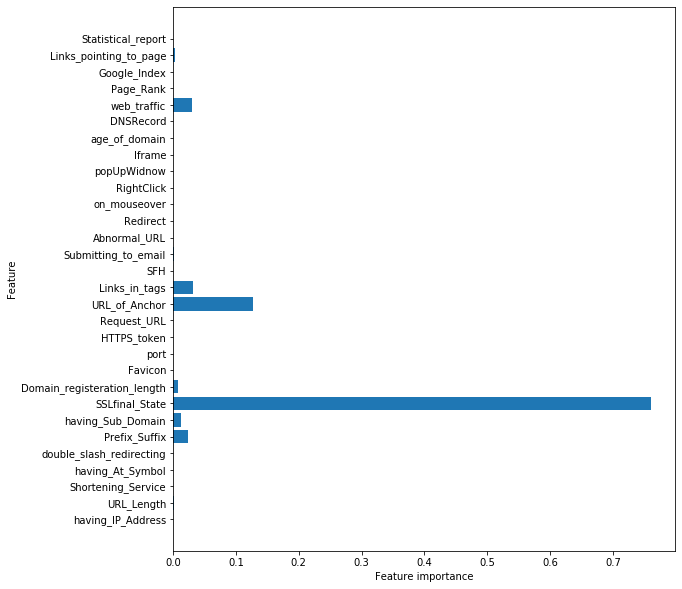

In [ ]:
plt.figure(figsize=(9,10))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Random Forest Classifier 

In [ ]:
# instantiate the model
forest = RandomForestClassifier(max_depth=5)
# fit the model 
forest.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
model_score=model.score(X_test, y_test)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on the Model: ",model_score)
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Random forest: Accuracy on the Model:  0.9308005427408412
Random forest: Accuracy on training Data: 0.930
Random forest: Accuracy on test Data: 0.931
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       975
           1       0.93      0.95      0.94      1236

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

[[ 882   93]
 [  60 1176]]


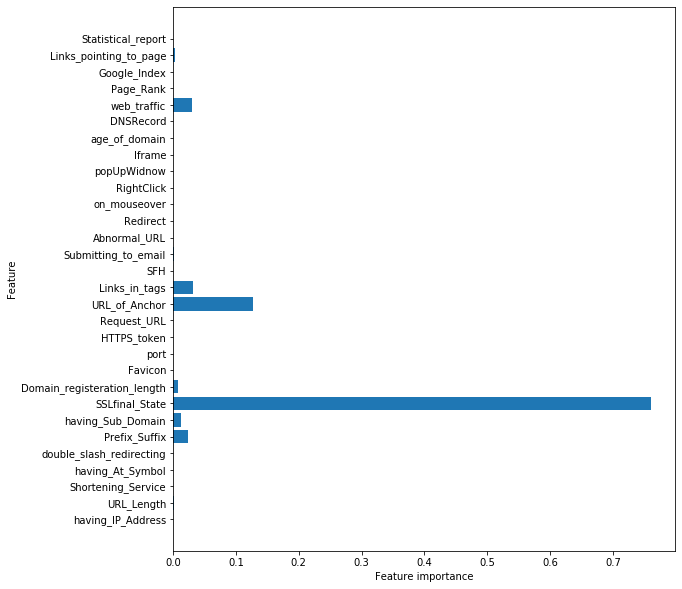

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,10))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random forest', acc_train_forest, acc_test_forest)

# KNeighborsClassifier

In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors =1)
# fit the model 
knn.fit(X_train,np.ravel(y_train,order='C'))
#predicting the target value from the model for the samples
y_predict= knn.predict(X_test)

#predicting the target value from the model for the samples
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)
model_score=knn.score(X_test, y_test)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNeighborsClassifier: Accuracy on the Model: ",model_score)
print("KNeighborsClassifier: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNeighborsClassifier: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

KNeighborsClassifier: Accuracy on the Model:  0.952962460425147
KNeighborsClassifier: Accuracy on training Data: 0.986
KNeighborsClassifier: Accuracy on test Data: 0.953
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       975
           1       0.96      0.96      0.96      1236

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211

[[ 923   52]
 [  52 1184]]


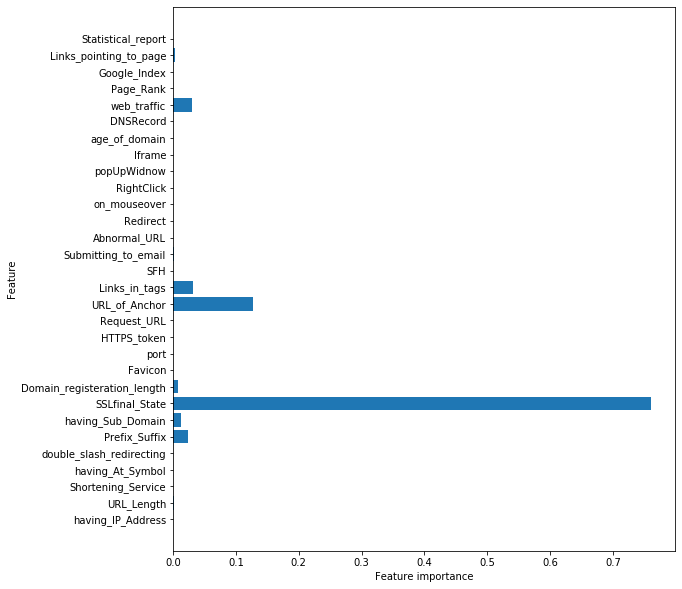

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,10))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('KNeighborsClassifier', acc_train_knn, acc_test_knn)

# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.928,0.931
1,Decision Tree,0.922,0.926
2,Random forest,0.930,0.931
3,KNeighborsClassifier,0.986,0.953


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,KNeighborsClassifier,0.986,0.953
2,Random forest,0.930,0.931
0,LogisticRegression,0.928,0.931
1,Decision Tree,0.922,0.926


### This is the end of the project.